<a href="https://colab.research.google.com/github/nehasha1/Horticulture_crops/blob/main/ETS(FAO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted Production till 2035:
  Year  Forecasted Production
 2024            2462.195398
 2025            3006.327619
 2026            2818.505014
 2027            3206.713058
 2028            3045.150658
 2029            3001.346213
 2030            3256.452026
 2031            3374.289629
 2032            3017.326819
 2033            3656.348406
 2034            3449.810744
 2035            3077.583552


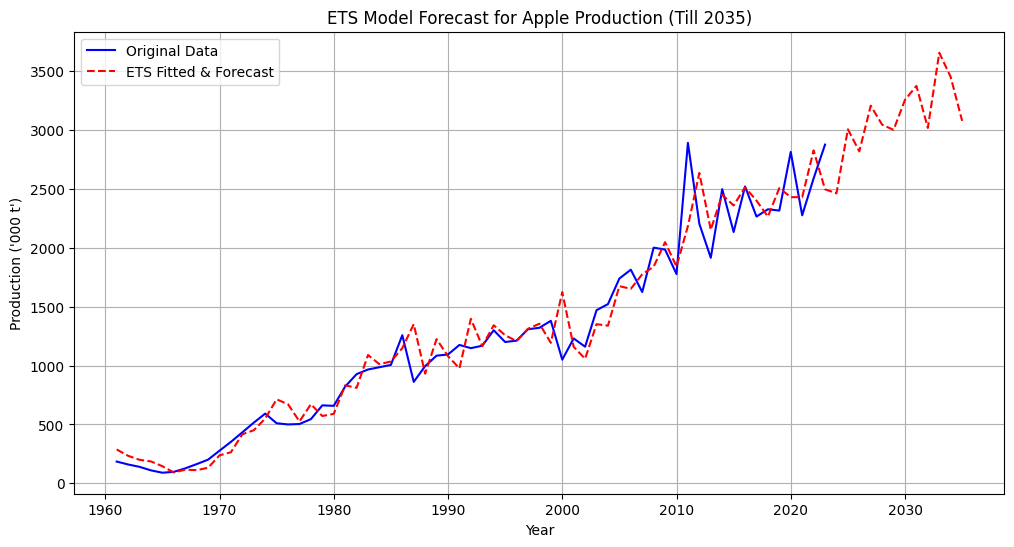

Mean Absolute Error (MAE): 131.00
Root Mean Squared Error (RMSE): 191.29
Mean Absolute Percentage Error (MAPE): 15.55%
{'smoothing_level': 0.6454648194471774, 'smoothing_trend': 0.14376468196953973, 'smoothing_seasonal': 0.03545496765196492, 'damping_trend': 0.970999912719305, 'initial_level': 112.83562185161853, 'initial_trend': 1.2232314234805461, 'initial_seasons': array([2.14662489, 1.98031436, 1.91867975, 2.06070537, 2.11679025,
       1.79023228, 2.16466456, 1.94656794, 1.68817693, 2.0667651 ,
       1.86492408]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/content/Apple.csv"  # Adjust path if needed
data = pd.read_csv(file_path)

# Ensure data is sorted by year and set index
data = data.sort_values("Year")
data.set_index("Year", inplace=True)

# Extract time series
time_series = data["Quantity(in '000t)"]

# Fit ETS model (additive trend, no seasonality)
ets_model = ExponentialSmoothing(time_series, trend="mul",seasonal="mul",seasonal_periods = 11, damped_trend=True)
ets_result = ets_model.fit()

# Forecast from last known year to 2035
future_years = np.arange(data.index[-1] + 1, 2036)
forecast = ets_result.forecast(len(future_years))
# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({"Year": future_years, "Forecasted Production": forecast})

# Print forecasted values
print("Forecasted Production till 2035:\n", forecast_df.to_string(index=False))

# Ensure a connected graph
all_years = np.concatenate([data.index, future_years])
all_values = np.concatenate([ets_result.fittedvalues, forecast])

# Compute error metrics
mae = mean_absolute_error(time_series, ets_result.fittedvalues)
rmse = np.sqrt(mean_squared_error(time_series, ets_result.fittedvalues))
mape = np.mean(np.abs((time_series - ets_result.fittedvalues) / time_series)) * 100

# Plot the connected graph
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label="Original Data", color="blue")
plt.plot(all_years, all_values, label="ETS Fitted & Forecast", linestyle="--", color="red")

plt.xlabel("Year")
plt.ylabel("Production ('000 t')")
plt.title("ETS Model Forecast for Apple Production (Till 2035)")
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
parameters = ets_result.params
print(parameters)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted Production till 2035:
  Year  Forecasted Production
 2024           37705.260607
 2025           39200.042884
 2026           40523.503227
 2027           41713.153820
 2028           43302.597460
 2029           44721.553145
 2030           46007.502308
 2031           47694.016301
 2032           49210.782016
 2033           50595.248147
 2034           52380.952712
 2035           53997.548699


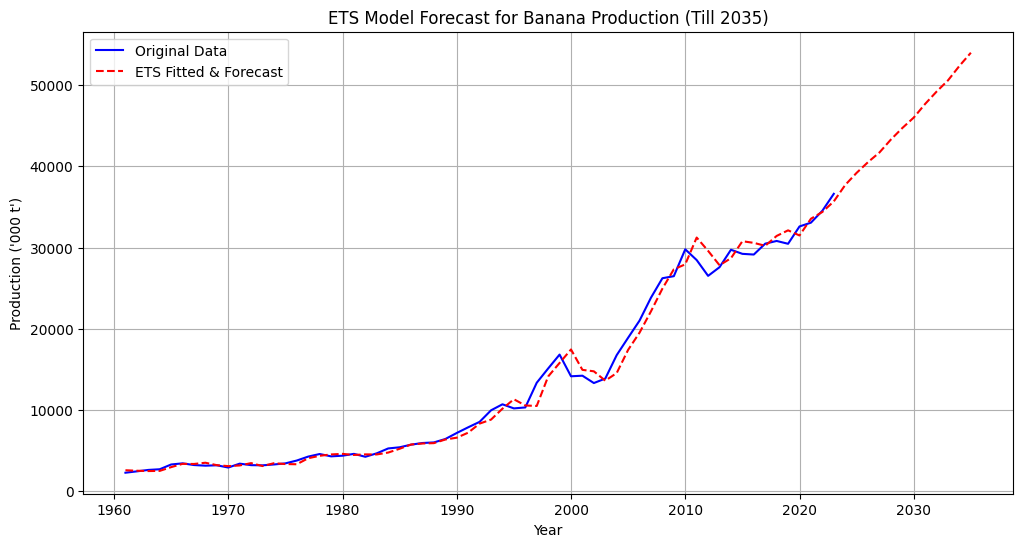

Mean Absolute Error (MAE): 741.75
Root Mean Squared Error (RMSE): 1093.16
Mean Absolute Percentage Error (MAPE): 5.97%
{'smoothing_level': 0.995, 'smoothing_trend': 0.03553571428571429, 'smoothing_seasonal': 0.0001, 'damping_trend': 0.99, 'initial_level': 2613.8044444444436, 'initial_trend': 1.0372885642151959, 'initial_seasons': array([-122.15555556,   67.40277778,   54.75277778]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/content/Banana.csv"  # Adjust path if needed
data = pd.read_csv(file_path)

# Ensure data is sorted by year and set index
data = data.sort_values("Year")
data.set_index("Year", inplace=True)

# Extract time series
time_series = data["Quantity(in '000 t)"]

# Fit ETS model (additive trend, no seasonality)
ets_model = ExponentialSmoothing(time_series, trend="mul", seasonal="add", seasonal_periods = 3, damped_trend=True)
ets_result = ets_model.fit()

# Forecast from last known year to 2035
future_years = np.arange(data.index[-1] + 1, 2036)
forecast = ets_result.forecast(len(future_years))
# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({"Year": future_years, "Forecasted Production": forecast})

# Print forecasted values
print("Forecasted Production till 2035:\n", forecast_df.to_string(index=False))

# Ensure a connected graph
all_years = np.concatenate([data.index, future_years])
all_values = np.concatenate([ets_result.fittedvalues, forecast])

# Compute error metrics
mae = mean_absolute_error(time_series, ets_result.fittedvalues)
rmse = np.sqrt(mean_squared_error(time_series, ets_result.fittedvalues))
mape = np.mean(np.abs((time_series - ets_result.fittedvalues) / time_series)) * 100

# Plot the connected graph
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label="Original Data", color="blue")
plt.plot(all_years, all_values, label="ETS Fitted & Forecast", linestyle="--", color="red")

plt.xlabel("Year")
plt.ylabel("Production ('000 t')")
plt.title("ETS Model Forecast for Banana Production (Till 2035)")
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
parameters = ets_result.params
print(parameters)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted Production till 2035:
  Year  Forecasted Production
 2024            3826.524463
 2025            3913.482925
 2026            3999.571803
 2027            4084.799793
 2028            4169.175502
 2029            4252.707454
 2030            4335.404087
 2031            4417.273753
 2032            4498.324723
 2033            4578.565183
 2034            4658.003238
 2035            4736.646913


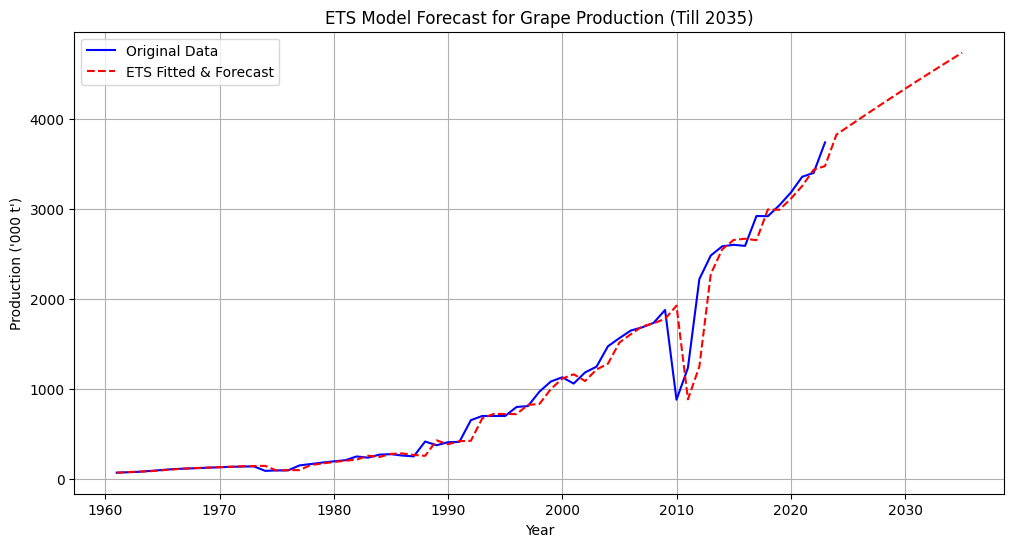

Mean Absolute Error (MAE): 85.78
Root Mean Squared Error (RMSE): 202.21
Mean Absolute Percentage Error (MAPE): 9.74%
{'smoothing_level': 0.995, 'smoothing_trend': 0.04738095238095238, 'smoothing_seasonal': nan, 'damping_trend': 0.99, 'initial_level': 62.33333333333331, 'initial_trend': 7.1212121212121255, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/content/Grape.csv"  # Adjust path if needed
data = pd.read_csv(file_path)

# Ensure data is sorted by year and set index
data = data.sort_values("Year")
data.set_index("Year", inplace=True)

# Extract time series
time_series = data["Quantity(in '000t)"]

# Fit ETS model (additive trend, no seasonality)
ets_model = ExponentialSmoothing(time_series, trend="add", seasonal=None, damped_trend=True)
ets_result = ets_model.fit()

# Forecast from last known year to 2035
future_years = np.arange(data.index[-1] + 1, 2036)
forecast = ets_result.forecast(len(future_years))
# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({"Year": future_years, "Forecasted Production": forecast})

# Print forecasted values
print("Forecasted Production till 2035:\n", forecast_df.to_string(index=False))

# Ensure a connected graph
all_years = np.concatenate([data.index, future_years])
all_values = np.concatenate([ets_result.fittedvalues, forecast])

# Compute error metrics
mae = mean_absolute_error(time_series, ets_result.fittedvalues)
rmse = np.sqrt(mean_squared_error(time_series, ets_result.fittedvalues))
mape = np.mean(np.abs((time_series - ets_result.fittedvalues) / time_series)) * 100

# Plot the connected graph
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label="Original Data", color="blue")
plt.plot(all_years, all_values, label="ETS Fitted & Forecast", linestyle="--", color="red")

plt.xlabel("Year")
plt.ylabel("Production ('000 t')")
plt.title("ETS Model Forecast for Grape Production (Till 2035)")
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
parameters = ets_result.params
print(parameters)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted Production till 2035:
  Year  Forecasted Production
 2024            1851.719018
 2025            1871.328272
 2026            1890.741434
 2027            1909.960465
 2028            1928.987305
 2029            1947.823876
 2030            1966.472082
 2031            1984.933806
 2032            2003.210913
 2033            2021.305249
 2034            2039.218641
 2035            2056.952899


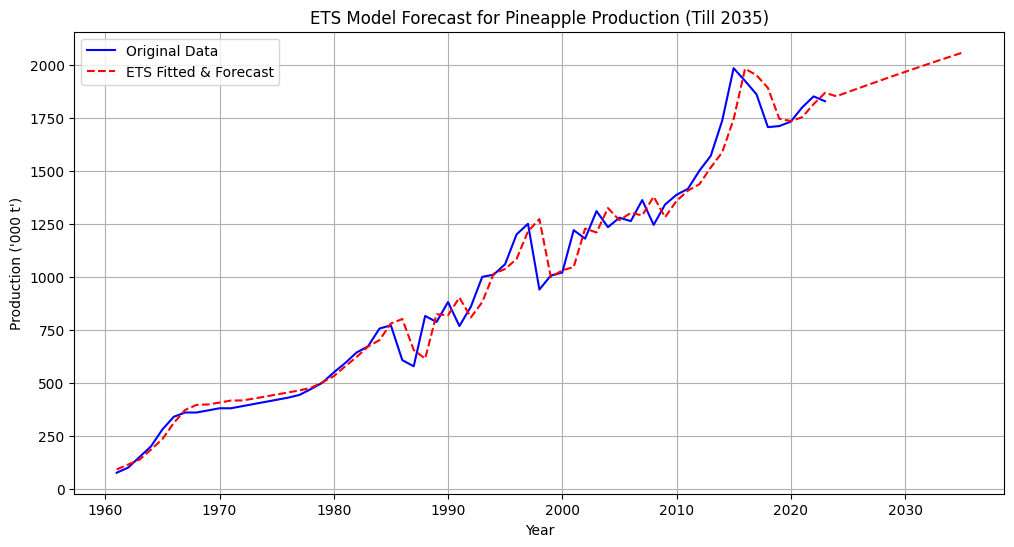

Mean Absolute Error (MAE): 59.00
Root Mean Squared Error (RMSE): 87.70
Mean Absolute Percentage Error (MAPE): 7.21%
{'smoothing_level': 0.9007142857142857, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': 0.99, 'initial_level': 54.39999999999999, 'initial_trend': 37.672727272727286, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/content/Pineapple.csv"
data = pd.read_csv(file_path)

# Ensure data is sorted by year and set index
data = data.sort_values("Year")
data.set_index("Year", inplace=True)

# Extract time series
time_series = data["Quantity(in '000t)"]

# Fit ETS model (additive trend, no seasonality)
ets_model = ExponentialSmoothing(time_series, trend="add", seasonal=None, damped_trend=True)
ets_result = ets_model.fit()

# Forecast from last known year to 2035
future_years = np.arange(data.index[-1] + 1, 2036)
forecast = ets_result.forecast(len(future_years))
# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({"Year": future_years, "Forecasted Production": forecast})

# Print forecasted values
print("Forecasted Production till 2035:\n", forecast_df.to_string(index=False))

# Ensure a connected graph
all_years = np.concatenate([data.index, future_years])
all_values = np.concatenate([ets_result.fittedvalues, forecast])

# Compute error metrics
mae = mean_absolute_error(time_series, ets_result.fittedvalues)
rmse = np.sqrt(mean_squared_error(time_series, ets_result.fittedvalues))
mape = np.mean(np.abs((time_series - ets_result.fittedvalues) / time_series)) * 100

# Plot the connected graph
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label="Original Data", color="blue")
plt.plot(all_years, all_values, label="ETS Fitted & Forecast", linestyle="--", color="red")

plt.xlabel("Year")
plt.ylabel("Production ('000 t')")
plt.title("ETS Model Forecast for Pineapple Production (Till 2035)")
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
parameters = ets_result.params
print(parameters)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted Production till 2035:
  Year  Forecasted Production
 2024            4476.346589
 2025            4782.518206
 2026            4623.056717
 2027            4325.075430
 2028            4777.402422
 2029            5019.410613
 2030            5237.653358
 2031            5936.427210
 2032            6324.585374
 2033            6096.644822
 2034            5687.923445
 2035            6265.594452


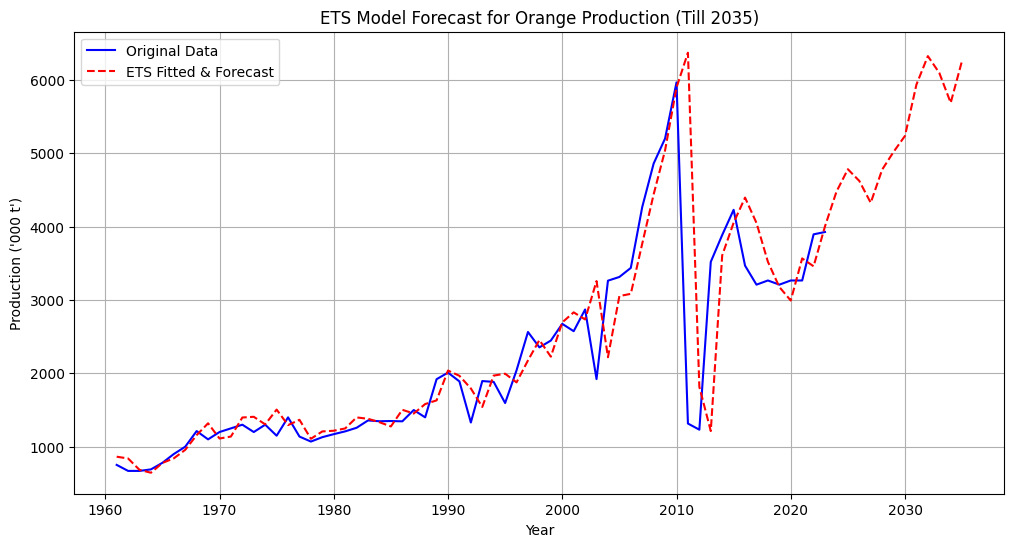

Mean Absolute Error (MAE): 340.06
Root Mean Squared Error (RMSE): 778.83
Mean Absolute Percentage Error (MAPE): 18.25%
{'smoothing_level': 0.8889285714285714, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.0001, 'damping_trend': 0.99, 'initial_level': 755.7333333333329, 'initial_trend': 1.0831291980538218, 'initial_seasons': array([1.06585323, 1.09237982, 1.01338429, 0.90999928, 0.96564091,
       0.97486266, 0.97787982]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/content/Orange.csv"  # Adjust path if needed
data = pd.read_csv(file_path)

# Ensure data is sorted by year and set index
data = data.sort_values("Year")
data.set_index("Year", inplace=True)

# Extract time series
time_series = data["Quantity(in '000t)"]

# Fit ETS model (additive trend, no seasonality)
ets_model = ExponentialSmoothing(time_series, trend="mul", seasonal="mul",seasonal_periods = 7, damped_trend=True)
ets_result = ets_model.fit()

# Forecast from last known year to 2035
future_years = np.arange(data.index[-1] + 1, 2036)
forecast = ets_result.forecast(len(future_years))
# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({"Year": future_years, "Forecasted Production": forecast})

# Print forecasted values
print("Forecasted Production till 2035:\n", forecast_df.to_string(index=False))

# Ensure a connected graph
all_years = np.concatenate([data.index, future_years])
all_values = np.concatenate([ets_result.fittedvalues, forecast])

# Compute error metrics
mae = mean_absolute_error(time_series, ets_result.fittedvalues)
rmse = np.sqrt(mean_squared_error(time_series, ets_result.fittedvalues))
mape = np.mean(np.abs((time_series - ets_result.fittedvalues) / time_series)) * 100

# Plot the connected graph
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label="Original Data", color="blue")
plt.plot(all_years, all_values, label="ETS Fitted & Forecast", linestyle="--", color="red")

plt.xlabel("Year")
plt.ylabel("Production ('000 t')")
plt.title("ETS Model Forecast for Orange Production (Till 2035)")
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
parameters = ets_result.params
print(parameters)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted Production till 2035:
  Year  Forecasted Production
 2024            5491.227594
 2025            5701.283813
 2026            5917.153635
 2027            6138.915116
 2028            6366.644835
 2029            6600.417823
 2030            6840.307496
 2031            7086.385597
 2032            7338.722123
 2033            7597.385271
 2034            7862.441374
 2035            8133.954846


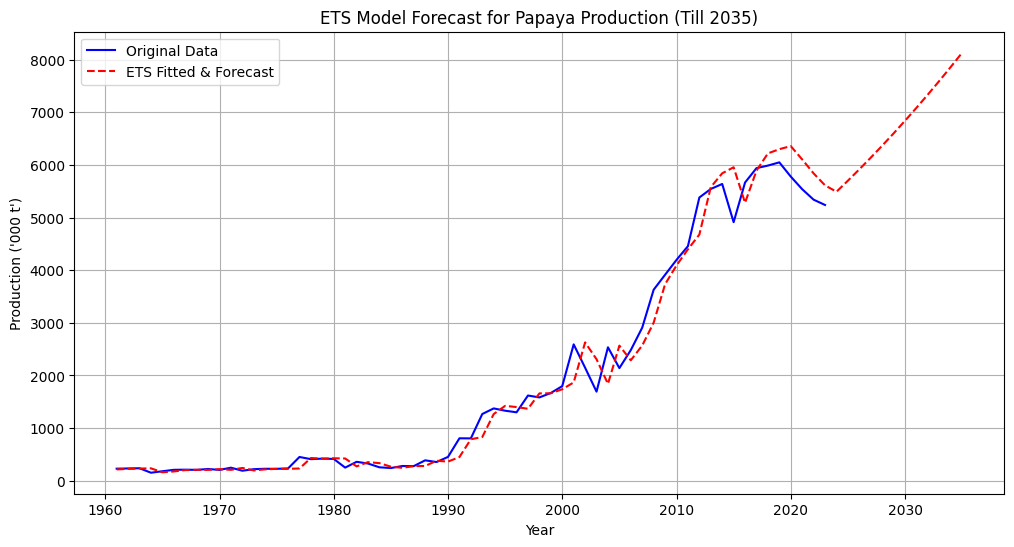

Mean Absolute Error (MAE): 192.29
Root Mean Squared Error (RMSE): 305.64
Mean Absolute Percentage Error (MAPE): 13.38%
{'smoothing_level': 0.8771428571428571, 'smoothing_trend': 0.02192857142857143, 'smoothing_seasonal': nan, 'damping_trend': 0.99, 'initial_level': 215.0639999999999, 'initial_trend': 1.0035099425090455, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/content/Papaya.csv"  # Adjust path if needed
data = pd.read_csv(file_path)

# Ensure data is sorted by year and set index
data = data.sort_values("Year")
data.set_index("Year", inplace=True)

# Extract time series
time_series = data["Quantity(in '000t)"]

# Fit ETS model (additive trend, no seasonality)
ets_model = ExponentialSmoothing(time_series, trend="mul", damped_trend=True)
ets_result = ets_model.fit()

# Forecast from last known year to 2035
future_years = np.arange(data.index[-1] + 1, 2036)
forecast = ets_result.forecast(len(future_years))
# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({"Year": future_years, "Forecasted Production": forecast})

# Print forecasted values
print("Forecasted Production till 2035:\n", forecast_df.to_string(index=False))

# Ensure a connected graph
all_years = np.concatenate([data.index, future_years])
all_values = np.concatenate([ets_result.fittedvalues, forecast])

# Compute error metrics
mae = mean_absolute_error(time_series, ets_result.fittedvalues)
rmse = np.sqrt(mean_squared_error(time_series, ets_result.fittedvalues))
mape = np.mean(np.abs((time_series - ets_result.fittedvalues) / time_series)) * 100

# Plot the connected graph
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label="Original Data", color="blue")
plt.plot(all_years, all_values, label="ETS Fitted & Forecast", linestyle="--", color="red")

plt.xlabel("Year")
plt.ylabel("Production ('000 t')")
plt.title("ETS Model Forecast for Papaya Production (Till 2035)")
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
parameters = ets_result.params
print(parameters)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted Production till 2035:
  Year  Forecasted Production
 2024           26928.966697
 2025           27535.356413
 2026           28135.682232
 2027           28730.004793
 2028           29318.384128
 2029           29900.879670
 2030           30477.550256
 2031           31048.454136
 2032           31613.648978
 2033           32173.191871
 2034           32727.139336
 2035           33275.547325


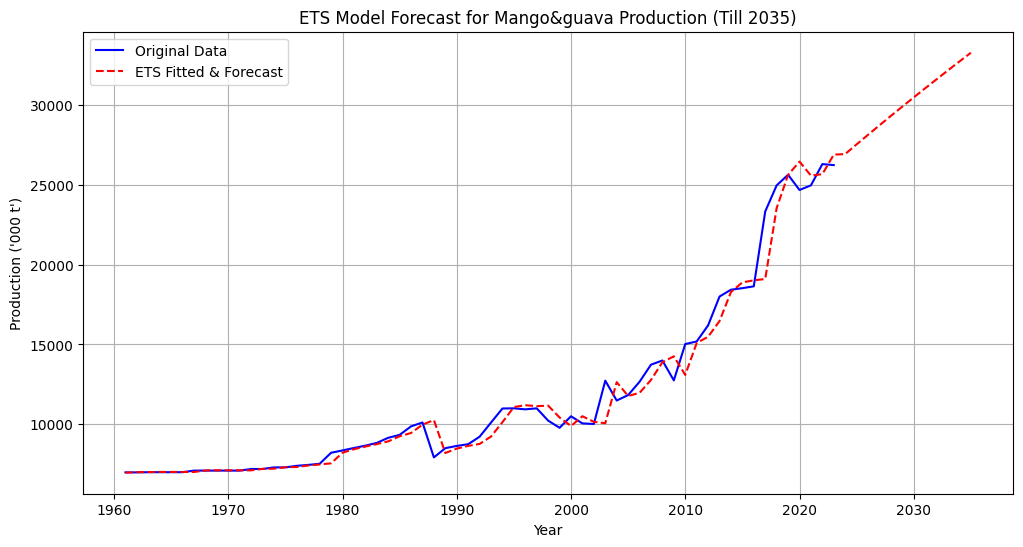

Mean Absolute Error (MAE): 514.87
Root Mean Squared Error (RMSE): 920.05
Mean Absolute Percentage Error (MAPE): 3.88%
{'smoothing_level': 0.8771428571428571, 'smoothing_trend': 0.08771428571428572, 'smoothing_seasonal': nan, 'damping_trend': 0.99, 'initial_level': 6951.199999999996, 'initial_trend': 15.709090909091287, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/content/Mango_guava.csv"  # Adjust path if needed
data = pd.read_csv(file_path)

# Ensure data is sorted by year and set index
data = data.sort_values("Year")
data.set_index("Year", inplace=True)

# Extract time series
time_series = data["Quantity(in '000t)"]

# Fit ETS model (additive trend, no seasonality)
ets_model = ExponentialSmoothing(time_series, trend="add", seasonal=None, damped_trend=True)
ets_result = ets_model.fit()

# Forecast from last known year to 2035
future_years = np.arange(data.index[-1] + 1, 2036)
forecast = ets_result.forecast(len(future_years))

# Create a DataFrame for forecasted values
forecast_df = pd.DataFrame({"Year": future_years, "Forecasted Production": forecast})

# Print forecasted values
print("Forecasted Production till 2035:\n", forecast_df.to_string(index=False))

# Ensure a connected graph
all_years = np.concatenate([data.index, future_years])
all_values = np.concatenate([ets_result.fittedvalues, forecast])

# Compute error metrics
mae = mean_absolute_error(time_series, ets_result.fittedvalues)
rmse = np.sqrt(mean_squared_error(time_series, ets_result.fittedvalues))
mape = np.mean(np.abs((time_series - ets_result.fittedvalues) / time_series)) * 100

# Plot the connected graph
plt.figure(figsize=(12, 6))
plt.plot(data.index, time_series, label="Original Data", color="blue")
plt.plot(all_years, all_values, label="ETS Fitted & Forecast", linestyle="--", color="red")

plt.xlabel("Year")
plt.ylabel("Production ('000 t')")
plt.title("ETS Model Forecast for Mango&guava Production (Till 2035)")
plt.legend()
plt.grid(True)
plt.show()

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
parameters = ets_result.params
print(parameters)